In [1]:
!pip install seaborn

     |████████████████████████████████| 296kB 15.1MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import all libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_classification

In [4]:
#load data 
world_cup = pd.read_csv('World Cup 2019 Dataset.csv')
results = pd.read_csv('results.csv')

In [5]:
print (world_cup.shape)
print (results.shape)

(10, 7)
(996, 6)


In [6]:
world_cup.head()

,Team,Group,Previous \nappearances,Previous \r\ntitles,Previous\r\n finals,Previous\nsemifinals,Current \r rank
0,England,A,11,0,3,5,1
1,South Africa,A,6,0,0,4,3
2,West Indies,A,11,2,3,4,8
3,Pakistan,A,11,1,2,6,6
4,New Zealand,A,11,0,1,7,4


In [7]:
results.head()

,date,Team_1,Team_2,Winner,Margin,Ground
0,4-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka
1,5-Jan-10,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka
2,7-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
3,8-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka
4,10-Jan-10,India,Sri Lanka,India,8 wickets,Dhaka


In [8]:
#exploring results to discover insights

In [9]:
#checking for India
df = results[(results['Team_1'] == 'India') | (results['Team_2'] == 'India')]
df.head()

,date,Team_1,Team_2,Winner,Margin,Ground
1,5-Jan-10,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka
2,7-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
4,10-Jan-10,India,Sri Lanka,India,8 wickets,Dhaka
5,11-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
6,13-Jan-10,India,Sri Lanka,Sri Lanka,4 wickets,Dhaka


In [10]:
df.shape

(198, 6)

In [11]:
#India Win Percentage in past matches
print((len(df[df['Winner'] == 'India'])/df.shape[0]) *100.0)

61.61616161616161


In [12]:
def get_win_percentage(list, data):
    my_df = pd.DataFrame(columns=["Country", "Win_Percentage"])
    country_list = [] 
    win_Percent_list = []
    match_played = []
    no_result = []
    tied = []
    win = []
    loss = []
    for i in list:
        df = data[(data['Team_1'] == i) | (data['Team_2'] == i)] 
        country_list.append(i)
        win.append(df[df['Winner'] == i].shape[0])
        loss.append(df[(df['Winner'] != i) & (df['Winner'] != 'no result') & (df['Winner'] != 'tied')].shape[0])
        win_Percent_list.append(round(len(df[df['Winner'] == i])/(df.shape[0])*100.0,2))
        match_played.append(df.shape[0])
        no_result.append(df[df['Winner'] == 'no result'].shape[0])
        tied.append(df[df['Winner'] == 'tied'].shape[0])
        
    my_df['Country'] = country_list
    my_df['Total_Matches'] = match_played
    my_df['Won'] = win
    my_df['Lost'] = loss
    my_df['No_result'] = no_result
    my_df['Tied'] = tied
    my_df['Win_Percentage'] = win_Percent_list

    return my_df.sort_values('Win_Percentage',ascending=False)    

In [13]:
list_of_participants = ['England', 'South Africa', 'West Indies', 'Pakistan', 'New Zealand', 
                        'Sri Lanka', 'Afghanistan', 'Australia', 'Bangladesh', 'India']

In [14]:
output = get_win_percentage(list_of_participants, results)

In [15]:
output

,Country,Win_Percentage,Total_Matches,Won,Lost,No_result,Tied
1,South Africa,61.84,152,94,53,4,1
9,India,61.62,198,122,66,6,4
7,Australia,59.44,180,107,61,11,1
0,England,53.49,172,92,71,6,3
3,Pakistan,50.00,174,87,82,3,2
6,Afghanistan,50.00,80,40,38,2,0
4,New Zealand,47.74,155,74,71,9,1
5,Sri Lanka,46.05,215,99,101,13,2
8,Bangladesh,40.32,124,50,69,5,0
2,West Indies,34.69,147,51,87,5,4


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

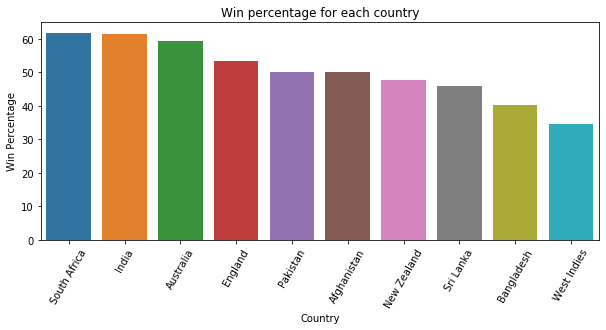

In [16]:
plt.figure(figsize=(10,4))
sns.barplot(x = 'Country', y = 'Win_Percentage', data = output).set_title('Win percentage for each country')
plt.xlabel("Country")
plt.ylabel("Win Percentage")
plt.xticks(rotation = 60)

In [17]:
output_subset = output[['Country','Won','Lost','Tied','No_result']]

<Figure size 1080x576 with 0 Axes>

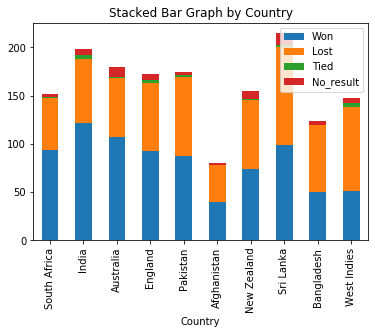

In [18]:
plt_1 =plt.figure(figsize=(15,8))
output_subset.plot(x='Country', kind='bar', stacked=True,
        title='Stacked Bar Graph by Country')
#plt.xlabel("Country")
#plt.ylabel("No. of Matches")
#plt.xticks(rotation = 60)
plt.show()

In [19]:
results.head()

,date,Team_1,Team_2,Winner,Margin,Ground
0,4-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka
1,5-Jan-10,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka
2,7-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
3,8-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka
4,10-Jan-10,India,Sri Lanka,India,8 wickets,Dhaka


In [20]:
#cleaning date column for exploration
results.loc[results.date == 'Jul 3-4, 2010', 'date'] = '03-07-2010'
results.loc[results.date == 'Aug 19-20, 2010', 'date'] = '19-08-2010'
results.loc[results.date == 'Jul 11-12, 2012', 'date'] = '11-07-2013'
results.loc[results.date == 'Jul 2-3, 2013', 'date'] = '02-07-2013'
results.loc[results.date == 'Jul 7-8, 2013', 'date'] = '03-07-2013'
results.loc[results.date == 'Aug 27-28, 2013', 'date'] = '27-08-2013'
results.loc[results.date == 'Dec 10-11, 2014', 'date'] = '10-12-2014'

In [21]:
#focusing on matches since 2011 (Current completed decade)
year = []
for row in results['date']:
    year.append(int(row[7:]))
results['match_year']= year
results_2011 = results[results.match_year >= 11]
#print((len(df_2010[df_2010['Winner'] == 'India'])/df_2010.shape[0]) *100.0)

In [22]:
results_2011.head()

,date,Team_1,Team_2,Winner,Margin,Ground,match_year
142,12-Jan-11,South Africa,India,South Africa,135 runs,Durban,11
143,15-Jan-11,South Africa,India,India,1 run,Johannesburg,11
144,16-Jan-11,Australia,England,Australia,6 wickets,Melbourne,11
145,18-Jan-11,South Africa,India,India,2 wickets,Cape Town,11
146,21-Jan-11,Australia,England,Australia,46 runs,Hobart,11


In [23]:
output_2011 = get_win_percentage(list_of_participants, results_2011)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

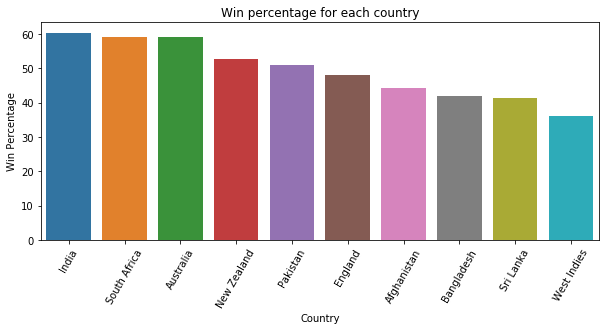

In [24]:
plt.figure(figsize=(10,4))
sns.barplot(x = 'Country', y = 'Win_Percentage', data = output_2011).set_title('Win percentage for each country')
plt.xlabel("Country")
plt.ylabel("Win Percentage")
plt.xticks(rotation = 60)

In [25]:
output_subset_1 = output_2011[['Country','Won','Lost','Tied','No_result']]

<Figure size 1080x576 with 0 Axes>

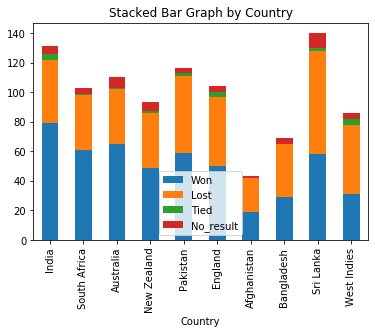

In [26]:
plt_2 =plt.figure(figsize=(15,8))
output_subset_1.plot(x='Country', kind='bar', stacked=True,
        title='Stacked Bar Graph by Country')
#plt.xlabel("Country")
#plt.ylabel("No. of Matches")
#plt.xticks(rotation = 60)
plt.show()

In [27]:
output_subset_1

,Country,Won,Lost,Tied,No_result
9,India,79,43,4,5
1,South Africa,61,37,1,4
7,Australia,65,37,1,7
4,New Zealand,49,37,1,6
3,Pakistan,59,52,2,3
0,England,50,47,3,4
6,Afghanistan,19,23,0,1
8,Bangladesh,29,36,0,4
5,Sri Lanka,58,70,2,10
2,West Indies,31,47,4,4
